<a href="https://colab.research.google.com/github/adewale-codes/NLP/blob/main/NLP_coursework_fixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing required libraries

In [ ]:
!pip install datasets
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 21.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which

Importing required libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizerFast, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import numpy as np
import evaluate
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NLP/Reviews.csv")
print("Total number of reviews:", df.shape[0])
print("Dataset columns:", df.columns)
print("First few rows:")
print(df.head())

Total number of reviews: 568454
Dataset columns: Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')
First few rows:
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200 

Using the score column as the rating column

In [ ]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


<ipython-input-5-e27c9c1a66b8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Score', palette='viridis')


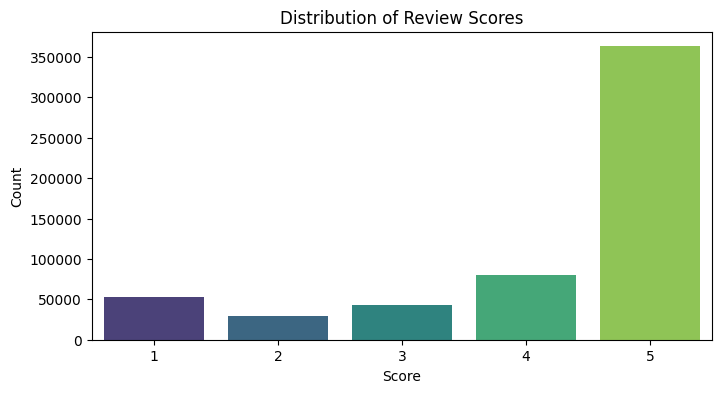

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Score', palette='viridis')
plt.title('Distribution of Review Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

In [ ]:
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
                  Id  HelpfulnessNumerator  HelpfulnessDenominator  \
count  568454.000000         568454.000000            568454.00000   
mean   284227.500000              1.743817                 2.22881   
std    164098.679298              7.636513                 8.28974   
min         1.000000              0.000000                 0.00000   
25%    142114.250000              0.000000                 0.00000   
50%    284227.500000              0.000000                 1.00000   
75%    426340.750000              2.000000                 2.00000   
max    568454.000000            866.000000               923.00000   

               Score          Time  
count  568454.000000  5.684540e+05  
mean        4.183199  1.296257e+09  
std         1.310436  4.804331e+07  
min         1.000000  9.393408e+08  
25%         4.000000  1.271290e+09  
50%         5.000000  1.311120e+09  
75%         5.000000  1.332720e+09  
max         5.000000  1.351210e+09  


In [ ]:
rating_column = 'Score'

Mapping the score column to sentiment lables setting 0 as negative, 1 as neutral and 2 as positive

In [ ]:
def map_sentiment(score):
    if score >= 4:
        return 2
    elif score <= 2:
        return 0
    else:
        return 1

In [ ]:
df['sentiment'] = df['Score'].apply(map_sentiment)
print("\nSentiment distribution:")
print(df['sentiment'].value_counts())


Sentiment distribution:
sentiment
2    443777
0     82037
1     42640
Name: count, dtype: int64


<ipython-input-11-0733d48d228c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='coolwarm')


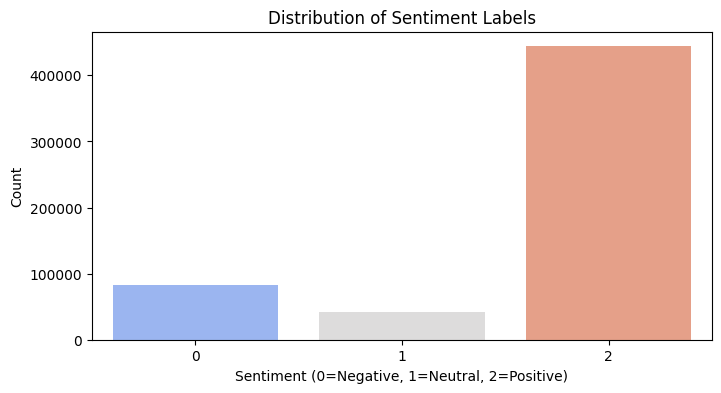

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='sentiment', data=df, palette='coolwarm')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment (0=Negative, 1=Neutral, 2=Positive)')
plt.ylabel('Count')
plt.show()

Creating a new column called label using the mapping function

In [ ]:
df['label'] = df[rating_column].apply(map_sentiment)

Dropped rows with missing review text. The column name is called Text

In [ ]:
df = df.dropna(subset=['Text'])

Split the dataset into training and testing sets

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

Converted the pandas DataFrames to Hugging Face Datasets

In [ ]:
train_dataset = Dataset.from_pandas(train_df.reset_index(drop=True))
test_dataset = Dataset.from_pandas(test_df.reset_index(drop=True))

Initialized a BERT tokenizer

In [ ]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Tokenized the dataset using the column called Text

In [ ]:
def tokenize_function(example):
    return tokenizer(example["Text"], padding="max_length", truncation=True, max_length=128)

In [ ]:
train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/454763 [00:00<?, ? examples/s]

Map:   0%|          | 0/113691 [00:00<?, ? examples/s]

Set the format for PyTorch tensors

In [ ]:
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

Load a pre-trained BERT model for sequence classification with 3 labels negative, neutral, positive

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Define the evaluation metric which is accuracy using evaluate.load

In [ ]:
accuracy_metric = evaluate.load("accuracy")

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return accuracy_metric.compute(predictions=predictions, references=labels)

Defined training arguments

In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_dir="./logs",
    logging_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    report_to=[],
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Initialized the Trainer

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

Fine tuning the model

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.238200,0.237195,0.916634
2,0.194400,0.241836,0.927250
3,0.149300,0.261546,0.933126


TrainOutput(global_step=85269, training_loss=0.2141971268040019, metrics={'train_runtime': 8034.9271, 'train_samples_per_second': 169.795, 'train_steps_per_second': 10.612, 'total_flos': 8.974068538967885e+16, 'train_loss': 0.2141971268040019, 'epoch': 3.0})

Evaluating the model on the test dataset

In [ ]:
eval_result = trainer.evaluate()
print("Evaluation results:", eval_result)

Evaluation results: {'eval_loss': 0.2615461051464081, 'eval_accuracy': 0.9331257531378913, 'eval_runtime': 198.0523, 'eval_samples_per_second': 574.045, 'eval_steps_per_second': 35.879, 'epoch': 3.0}


Tesing the model

In [ ]:
import torch

example_review = "I absolutely hate this product, it below all my expectations!"
inputs = tokenizer(example_review, return_tensors="pt", truncation=True, padding="max_length", max_length=128)

inputs = {k: v.to(model.device) for k, v in inputs.items()}

outputs = model(**inputs)

predicted_class = int(np.argmax(outputs.logits.detach().cpu().numpy(), axis=-1)[0])

sentiment_mapping = {0: "Negative", 1: "Neutral", 2: "Positive"}
print(f"Review: {example_review}")
print(f"Predicted Sentiment: {sentiment_mapping[predicted_class]}")

Review: I absolutely hate this product, it below all my expectations!
Predicted Sentiment: Positive


# Since the model took so long to run i saved the checkpoints so rather than running from beginning you can run from the third epoch and save time to. To do that i added these codes below

Importing the libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizerFast, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import numpy as np
import evaluate
import torch

Loading the dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NLP/Reviews.csv")
print("Dataset columns:", df.columns)
print("First few rows:")
print(df.head())

Using the score column as the rating column

In [ ]:
rating_column = 'Score'

Mapping the score column to sentiment lables setting 0 as negative, 1 as neutral and 2 as positive

In [ ]:
def map_sentiment(score):
    if score >= 4:
        return 2
    elif score <= 2:
        return 0
    else:
        return 1

Splitting the dataset into training and testing sets

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_dataset = Dataset.from_pandas(train_df.reset_index(drop=True))
test_dataset = Dataset.from_pandas(test_df.reset_index(drop=True))

Tokenization and Formatting

In [ ]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [ ]:
def tokenize_function(example):
    return tokenizer(example["Text"], padding="max_length", truncation=True, max_length=128)

In [ ]:
train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

Model and Trainer Setup

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

Defined evaluation metric using evaluate.load

In [ ]:
accuracy_metric = evaluate.load("accuracy")
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return accuracy_metric.compute(predictions=predictions, references=labels)

In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_dir="./logs",
    logging_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    report_to=[],
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

Checkpoint path

In [ ]:
checkpoint_path = "/content/drive/MyDrive/results/checkpoint-85269"
trainer.train(resume_from_checkpoint=checkpoint_path)

Evaluating model after resuming training

In [ ]:
eval_result = trainer.evaluate()
print("Evaluation results:", eval_result)

Load the model from a checkpoint without further training

In [ ]:
model = BertForSequenceClassification.from_pretrained(checkpoint_path)

Testing the model

In [ ]:
example_review = "I absolutely hate this product, it below all my expectations!"
inputs = tokenizer(example_review, return_tensors="pt", truncation=True, padding="max_length", max_length=128)
inputs = {k: v.to(model.device) for k, v in inputs.items()}

outputs = model(**inputs)
predicted_class = int(np.argmax(outputs.logits.detach().cpu().numpy(), axis=-1)[0])
sentiment_mapping = {0: "Negative", 1: "Neutral", 2: "Positive"}
print(f"Review: {example_review}")
print(f"Predicted Sentiment: {sentiment_mapping[predicted_class]}")

Saving the model to create backend

In [ ]:
trainer.save_model("./saved_model")

tokenizer.save_pretrained("./saved_model")
